# Novas Bibliotecas

1. Pandas
2. seaborn

In [46]:
import pandas as pd
publi = pd.read_csv('https://www.statlearning.com/s/Advertising.csv',index_col=0)
#publi = pd.read_csv('datasets/Advertising.csv', index_col=0)
publi.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [47]:
print(type(publi))
print(publi.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 4)


In [48]:
x = publi[['TV','radio','newspaper']]
y = publi['sales']

In [49]:
x.shape

(200, 3)

In [50]:
y.shape

(200,)

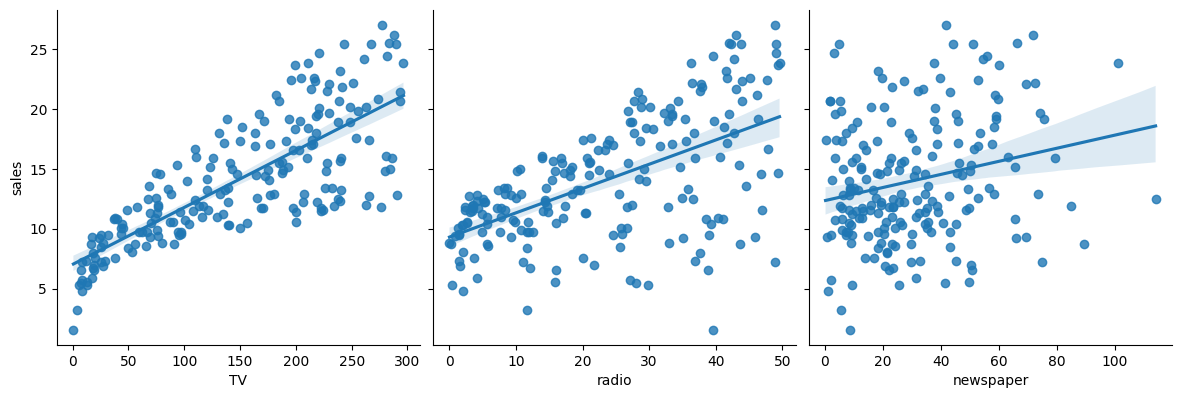

In [51]:
import seaborn as sns
sns.pairplot(publi, x_vars=['TV','radio','newspaper'], y_vars='sales', height=4, kind='reg')

In [62]:
from sklearn.model_selection import train_test_split
#O random_state serve para manter o mesmo estado de aleatoriedade -> random_state=5
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3)



### Importação do modelo regrassão linear

In [63]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x_train, y_train)

LinearRegression()

### Coeficientes:  Aumento nas vendas para cada 1un

In [69]:
print(reglin.coef_)


[ 4.46915226e-02  1.92858191e-01 -1.10461203e-04]


##### Teste da distribuição no gráfico para ver o comportamento da reta de regressão, pois o último coef às vezes está negativo

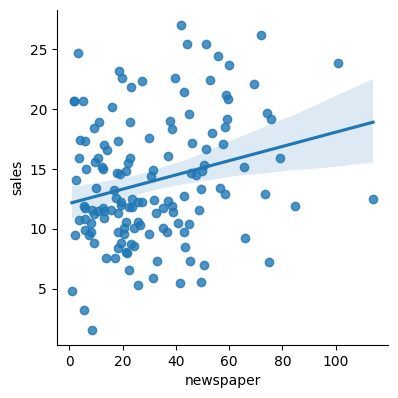

In [74]:
df1 = pd.concat([x_train, y_train.reindex(x_train.index)], axis=1)
df1.head()

sns.pairplot(df1, x_vars=['newspaper'], y_vars='sales', height=4, kind='reg')


### Previsões

In [55]:
print(reglin.predict([[230.1, 37.8, 69.2]]))

[20.76614234]


C:\Users\Jean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
y_prev = reglin.predict(x_test)
print(y_prev)

[10.07511152 10.01181201  8.77859561 11.26148812 16.22326808  6.84103422
 13.95469531 12.74223658 15.15688589 12.1105739  12.76364569 20.22311173
 14.60974408 12.50639461 13.68401403 11.01077512  6.96706096 16.31953801
 12.95437419  7.87344038  8.71010655  5.700087   17.87137002  7.48090014
 11.99159531 16.6373705  15.26260347 14.76902541 19.47520974 17.2047805
 14.55423908 18.06733104 14.1619709  13.3950577  19.27954344  9.02809549
  9.5775455  11.83448968 18.0388085  23.32306938 12.74517941 10.80290632
 13.1826807  13.59294551 16.55760643 10.26904809  4.5495467  24.32754345
  7.5256285  24.96741182 17.4761565  14.61243722  6.43439571 18.71562803
  9.33299861  7.37382327 16.07083624 16.28198473 14.42926745 20.2076929 ]


### Avaliação da Performance
#### MAE (Mean absolute error)

In [59]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_prev))

1.3213322298690964


#### MSE (Mean squared error)

In [60]:
print(metrics.mean_squared_error(y_test,y_prev))

3.361443991843236


#### RMSE (Root mean squared error)

In [61]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_prev)))

1.8334241167398329
